# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kinanthi Putri Ariyani
- **Email:** M296D4KX2706@bangkit.academy
- **ID Dicoding:** kinanthiputriariyani

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola rata-rata jumlah peminjaman sepeda per jam berubah antara hari kerja dan akhir pekan?
- Pertanyaan 2 : Apakah ada perbedaan pola peminjaman sepeda di musim panas, gugur, musim dingin, dan musim semi?
- Pertanyaan 3 : Bagaimana tingkat peminjaman sepeda berubah sepanjang bulan (tahun 2011-2012)?

## Import Semua Packages/Library yang Digunakan

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [156]:
# Membaca dataset day.csv dalam bentuk dataframe
day_df = pd.read_csv("C:\\Users\\LENOVO\\Bangkit\\day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [157]:
# Membaca dataset hour.csv dalam bentuk dataframe
hour_df = pd.read_csv("C:\\Users\\LENOVO\\Bangkit\\hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

#### **[Day Dataset]**

In [158]:
# Memberikan informasi tentang dataset day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [159]:
# Memeriksa apakah terdapat nilai yang hilang
missing_values = day_df.isnull().sum()

# Menampilkan jumlah dan lokasi nilai yang hilang (jika ada)
if missing_values.sum() > 0:
    print("Terdapat missing value pada dataset day:")
    print(missing_values)
else:
    print("Tidak ada missing value pada dataset day.")

Tidak ada missing value pada dataset day.


In [160]:
# Memeriksa apaka terdapat data yang terduplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [161]:
# Ringkasan Statistika Deskriptif
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### **[Hour Dataset]**

In [162]:
# Memberikan informasi tentang dataset hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [163]:
# Memeriksa apakah terdapat nilai yang hilang
missing_values = hour_df.isnull().sum()

# Menampilkan jumlah dan lokasi nilai yang hilang (jika ada)
if missing_values.sum() > 0:
    print("Terdapat missing value pada dataset hour:")
    print(missing_values)
else:
    print("Tidak ada missing value pada dataset hour.")

Tidak ada missing value pada dataset hour.


In [164]:
# Memeriksa apaka terdapat data yang terduplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [165]:
# Ringkasan Statistika Deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### **[Day Dataset]**

In [166]:
# Mengganti nama kolom
# Menggunakan metode rename pada DataFrame untuk mengubah nama kolom
day_df.rename(columns={"dteday": "dateday", "yr": "year", "mnth": "month", "weathersit": "weathercituation", "hum": "humidity", "casual": "unregistered", "cnt": "count"}, inplace=True)

In [167]:
# Mengganti nilai 0 dengan 2011 dan nilai 1 dengan 2012 pada kolom 'year'
day_df['year'].replace({0: 2011, 1: 2012}, inplace=True)

In [168]:
# Mengganti tipe data pada kolom 'dteday' menjadi datetime
datetime_columns = ["dateday"]
 
for column in datetime_columns:
    day_df["dateday"] = pd.to_datetime(day_df["dateday"])

In [169]:
# Mengganti tipe data menjadi kategori
category_column = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathercituation']

# Mengubah tipe data kolom menjadi kategori
day_df[category_column] = day_df[category_column].astype('category')

In [170]:
# Memberikan informasi tentang dataset day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   dateday           731 non-null    datetime64[ns]
 2   season            731 non-null    category      
 3   year              731 non-null    category      
 4   month             731 non-null    category      
 5   holiday           731 non-null    category      
 6   weekday           731 non-null    category      
 7   workingday        731 non-null    category      
 8   weathercituation  731 non-null    category      
 9   temp              731 non-null    float64       
 10  atemp             731 non-null    float64       
 11  humidity          731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  unregistered      731 non-null    int64         
 14  registered        731 non-

In [171]:
day_df

,instant,dateday,season,year,month,holiday,weekday,workingday,weathercituation,temp,atemp,humidity,windspeed,unregistered,registered,count
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


#### **[Hour Dataset]**

In [172]:
# Mengganti nama kolom
# Menggunakan metode rename pada DataFrame untuk mengubah nama kolom
hour_df.rename(columns={"dteday": "dateday", "yr": "year", "mnth": "month", "hr": "hour", "weathersit": "weathercituation", "hum": "humidity", "casual": "unregistered", "cnt": "count"}, inplace=True)

In [173]:
# Mengganti nilai 0 dengan 2011 dan nilai 1 dengan 2012 pada kolom 'year'
hour_df['year'].replace({0: 2011, 1: 2012}, inplace=True)

In [174]:
# Mengganti tipe data pada kolom 'dteday' menjadi datetime
datetime_columns = ["dateday"]
 
for column in datetime_columns:
    hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])

In [175]:
# Mengganti tipe data menjadi kategori
category_column = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathercituation']

# Mengubah tipe data kolom menjadi kategori
hour_df[category_column] = hour_df[category_column].astype('category')

In [176]:
# Memberikan informasi tentang dataset hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   dateday           17379 non-null  datetime64[ns]
 2   season            17379 non-null  category      
 3   year              17379 non-null  category      
 4   month             17379 non-null  category      
 5   hour              17379 non-null  int64         
 6   holiday           17379 non-null  category      
 7   weekday           17379 non-null  category      
 8   workingday        17379 non-null  category      
 9   weathercituation  17379 non-null  category      
 10  temp              17379 non-null  float64       
 11  atemp             17379 non-null  float64       
 12  humidity          17379 non-null  float64       
 13  windspeed         17379 non-null  float64       
 14  unregistered      1737

In [177]:
hour_df

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathercituation,temp,atemp,humidity,windspeed,unregistered,registered,count
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

### Explore Day Dataset

In [178]:
# Menghitung total dari kelompok kolom 'year'
day_df.groupby(by="year").agg({
    "count": "sum",
    "registered":"sum",
    "unregistered":"sum"
})

,count,registered,unregistered
year,,,
2011,1243103,995851,247252
2012,2049576,1676811,372765


Kesimpulan : 
- Total Count (Jumlah Total):
1) Tahun 2011 memiliki total 1,243,103 kejadian.
2) Tahun 2012 memiliki total 2,049,576 kejadian.
- Registered (Terdaftar):
1) Tahun 2011 memiliki total 995,851 kejadian yang terdaftar.
2) Tahun 2012 memiliki total 1,676,811 kejadian yang terdaftar.
- Unregistered (Tidak Terdaftar):
1) Tahun 2011 memiliki total 247,252 kejadian yang tidak terdaftar.
2) Tahun 2012 memiliki total 372,765 kejadian yang tidak terdaftar.

In [179]:
# Menghitung total dari kelompok kolom 'season'
day_df.groupby(by="season").agg({
    "count": "sum",
    "registered":"sum",
    "unregistered":"sum"
}).sort_values(by="count", ascending=False)

,count,registered,unregistered
season,,,
3,1061129,835038,226091
2,918589,715067,203522
4,841613,711831,129782
1,471348,410726,60622


**1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'**

Kesimpulan :
- Total Count (Jumlah Total):
1) Musim Fall memiliki total 1,061,129 kejadian.
2) Musim Summer memiliki total 918,589 kejadian.
3) Musim Winter memiliki total 841,613 kejadian.
4) Musim Spring memiliki total 471,348 kejadian.
- Registered (Terdaftar):
1) Musim Fall memiliki total 835,038 kejadian yang terdaftar.
2) Musim Summer memiliki total 715,067 kejadian yang terdaftar.
3) Musim Winter memiliki total 711,831 kejadian yang terdaftar.
4) Musim Spring memiliki total 410,726 kejadian yang terdaftar.
- Unregistered (Tidak Terdaftar):
1) Musim Fall memiliki total 226,091 kejadian yang tidak terdaftar.
2) Musim Summer memiliki total 203,522 kejadian yang tidak terdaftar.
3) Musim Winter memiliki total 129,782 kejadian yang tidak terdaftar.
4) Musim Spring memiliki total 60,622 kejadian yang tidak terdaftar.

In [180]:
# Menghitung total dari kelompok kolom 'workingday'
day_df.groupby(by="workingday").agg({
    "count":"sum",
    "registered":"sum",
    "unregistered": "sum"
}).sort_values(by="count", ascending=False)

,count,registered,unregistered
workingday,,,
1,2292410,1989125,303285
0,1000269,683537,316732


Kesimpulan :
- Total Count (Jumlah Total):
1. Pada hari kerja (workingday=1), terdapat total 2,292,410 kejadian.
2. Pada hari libur (workingday=0), terdapat total 1,000,269 kejadian.
- Registered (Terdaftar):
1. Pada hari kerja (workingday=1), terdapat total 1,989,125 kejadian yang terdaftar.
2. Pada hari libur (workingday=0), terdapat total 683,537 kejadian yang terdaftar.
- Unregistered (Tidak Terdaftar):
1. Pada hari kerja (workingday=1), terdapat total 303,285 kejadian yang tidak terdaftar.
2. Pada hari libur (workingday=0), terdapat total 316,732 kejadian yang tidak terdaftar.

In [181]:
# Menghitung total dari kelompok kolom 'holiday'
day_df.groupby(by="holiday").agg({
    "count":"sum",
    "registered":"sum",
    "unregistered": "sum"
}).sort_values(by="count", ascending=False)

,count,registered,unregistered
holiday,,,
0,3214244,2616586,597658
1,78435,56076,22359


Kesimpulan:
- Total Count (Jumlah Total):
1. Pada hari bukan libur (holiday=0), terdapat total 3,214,244 kejadian.
2. Pada hari libur (holiday=1), terdapat total 78,435 kejadian.
- Registered (Terdaftar):
1. Pada hari bukan libur (holiday=0), terdapat total 2,616,586 kejadian yang terdaftar.
2. Pada hari libur (holiday=1), terdapat total 56,076 kejadian yang terdaftar.
- Unregistered (Tidak Terdaftar):
1. Pada hari bukan libur (holiday=0), terdapat total 597,658 kejadian yang tidak terdaftar.
2. Pada hari libur (holiday=1), terdapat total 22,359 kejadian yang tidak terdaftar.

### Explore Hour Dataset

In [182]:
# Menghitung total dari kelompok kolom 'weathercituation'
hour_df.groupby(by="weathercituation").agg({
    "count":"sum",
    "registered":"sum",
    "unregistered": "sum"
}).sort_values(by="count", ascending=False)

,count,registered,unregistered
weathercituation,,,
1,2338173,1875428,462745
2,795952,661471,134481
3,158331,135548,22783
4,223,215,8


**1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow**

Kesimpulan :
- Total Count (Jumlah Total):
1. Pada situasi cuaca Clear, terdapat total 2,338,173 kejadian.
2. Pada situasi cuaca Mist, terdapat total 795,952 kejadian.
3. Pada situasi cuaca Light Rain/Snow, terdapat total 158,331 kejadian.
4. Pada situasi cuaca Heavy Rain/Snow, terdapat total 223 kejadian.
- Registered (Terdaftar):
1. Pada situasi cuaca Clear, terdapat total 1,875,428 kejadian yang terdaftar.
2. Pada situasi cuaca Mist, terdapat total 661,471 kejadian yang terdaftar.
3. Pada situasi cuaca Light Rain/Snow, terdapat total 135,548 kejadian yang terdaftar.
4. Pada situasi cuaca Heavy Rain/Snow, terdapat total 215 kejadian yang terdaftar.
- Unregistered (Tidak Terdaftar):
1. Pada situasi cuaca Clear, terdapat total 462,745 kejadian yang tidak terdaftar.
2. Pada situasi cuaca Mist, terdapat total 134,481 kejadian yang tidak terdaftar.
3. Pada situasi cuaca Light Rain/Snow, terdapat total 22,783 kejadian yang tidak terdaftar.
4. Pada situasi cuaca Heavy Rain/Snow, terdapat total 8 kejadian yang tidak terdaftar.

In [183]:
# Menghitung total dari kelompok kolom 'hour'
hour_df.groupby(by="hour").agg({
    "count": "sum",
    "registered":"sum",
    "unregistered":"sum"
}).sort_values(by="count", ascending=False)

,count,registered,unregistered
hour,,,
17,336860,282640,54220
18,309772,265276,44496
8,261001,245240,15761
16,227748,173914,53834
19,226789,191284,35505
13,184919,132206,52713
12,184414,134696,49718
15,183149,128543,54606
14,175652,120563,55089


Kesimpulan :
- Total Count (Jumlah Total):
1. Jam 17 memiliki total 336,860 kejadian, yang merupakan jumlah tertinggi pada data yang diberikan.
2. Jam 4 memiliki total 4,428 kejadian, yang merupakan jumlah terendah pada data yang diberikan.
- Registered (Terdaftar):
1. Jam 17 memiliki total 282,640 kejadian yang terdaftar, yang merupakan jumlah tertinggi pada data yang diberikan.
2. Jam 4 memiliki total 3,554 kejadian yang terdaftar, yang merupakan jumlah terendah pada data yang diberikan.
- Unregistered (Tidak Terdaftar):
1. Jam 17 memiliki total 54,220 kejadian yang tidak terdaftar, yang merupakan jumlah tertinggi pada data yang diberikan.
2. Jam 7 memiliki total 8,037 kejadian yang tidak terdaftar, yang merupakan jumlah terendah pada data yang diberikan.

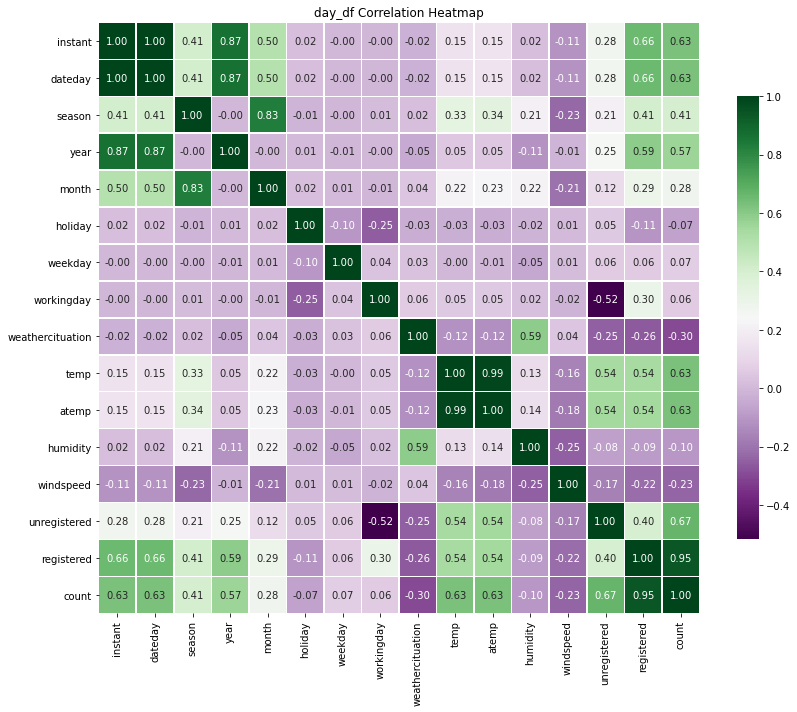

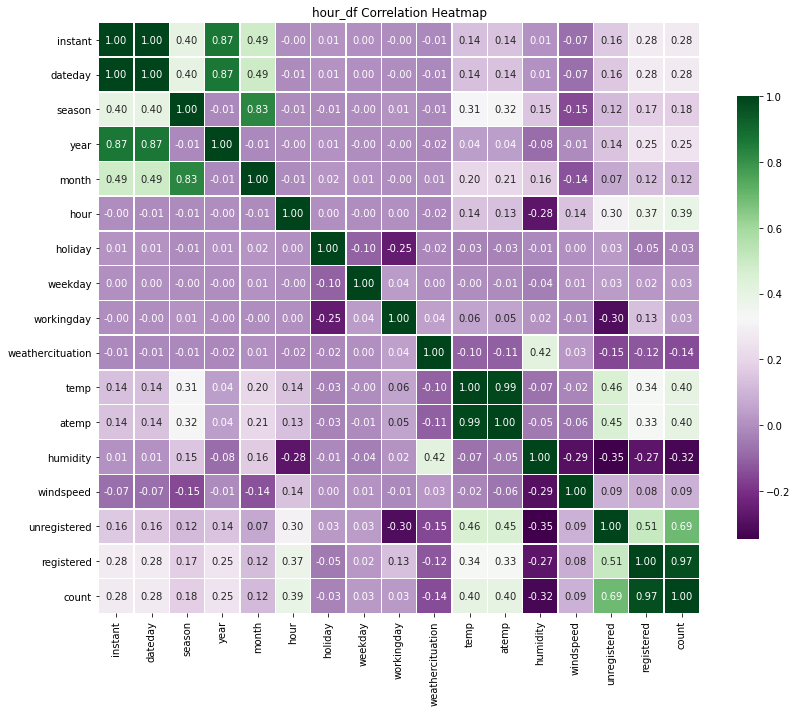

In [184]:
# Fungsi untuk membuat correlation heatmap
def create_corr_heatmap(data, name):
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(data=data, 
                annot=True, 
                annot_kws={'fontsize': 10}, 
                fmt='.2f', 
                cmap='PRGn',
                linewidths=.5,
                cbar_kws={"shrink": 0.75})
                
    plt.title(f"{name} Correlation Heatmap")
    plt.tight_layout()
    plt.show()

# Hitung korelasi untuk kedua dataframe
daily_corr = day_df.corr()
hourly_corr = hour_df.corr()

# Buat correlation heatmap untuk dataframe day_df
create_corr_heatmap(daily_corr, 'day_df')

# Buat correlation heatmap untuk dataframe hour_df
create_corr_heatmap(hourly_corr, 'hour_df')


Dari kedua heatmap yang telah dibuat, dapat diamati bahwa kolom-kolom dengan nilai korelasi positif mendekati 1 menunjukkan hubungan yang sangat kuat, sementara kolom-kolom dengan nilai korelasi negatif mendekati -1 menunjukkan hubungan yang cenderung lemah.

In [185]:
# Menggabungkan dataset day dan hour berdasarkan tanggal
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="dateday",
    right_on="dateday"
)
all_df

,instant_x,dateday,season_x,year_x,month_x,hour,holiday_x,weekday_x,workingday_x,weathercituation_x,...,weekday_y,workingday_y,weathercituation_y,temp_y,atemp_y,humidity_y,windspeed_y,unregistered_y,registered_y,count_y
0,1,2011-01-01,1,2011,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,2011,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,2011,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,2011,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,2011,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,2012,12,19,0,1,1,2,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,1,2012,12,20,0,1,1,2,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,1,2012,12,21,0,1,1,1,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,1,2012,12,22,0,1,1,1,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [186]:
# Menampilkan daftar kolom
print("Kolom-kolom dalam dataset:")
print(all_df.columns)

Kolom-kolom dalam dataset:
Index(['instant_x', 'dateday', 'season_x', 'year_x', 'month_x', 'hour',
       'holiday_x', 'weekday_x', 'workingday_x', 'weathercituation_x',
       'temp_x', 'atemp_x', 'humidity_x', 'windspeed_x', 'unregistered_x',
       'registered_x', 'count_x', 'instant_y', 'season_y', 'year_y', 'month_y',
       'holiday_y', 'weekday_y', 'workingday_y', 'weathercituation_y',
       'temp_y', 'atemp_y', 'humidity_y', 'windspeed_y', 'unregistered_y',
       'registered_y', 'count_y'],
      dtype='object')


- _x merupakan day_df 
- _y merupakan hour_df

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola rata-rata jumlah peminjaman sepeda per jam berubah antara hari kerja dan akhir pekan?


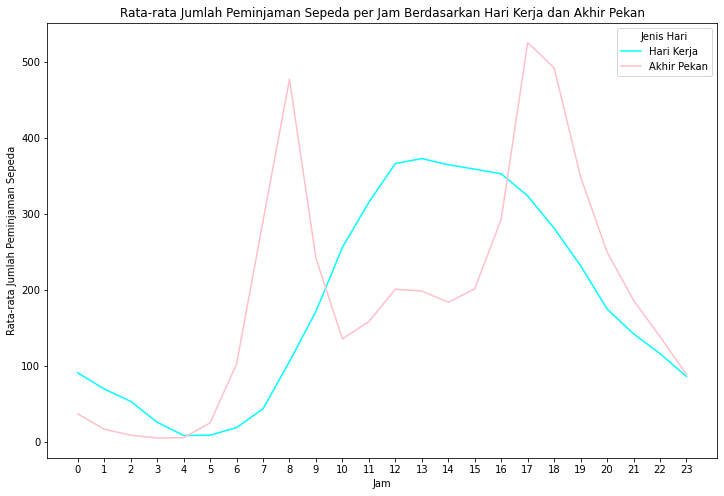

In [187]:
# Mengelompokkan data
grouped_hour_custom = all_df.groupby(['workingday_x', 'hour'])['count_x'].mean().reset_index(name='average_counts')

# Ukuran Visualisasi
fig, ax = plt.subplots(figsize=(12, 8))

# Loop melalui nilai workingday
for workingday, group in grouped_hour_custom.groupby('workingday_x'):
    day_type = 'Hari Kerja' if workingday else 'Akhir Pekan'
    
    # Mengonversi data DataFrame ke numpy array
    hours_np = group['hour'].to_numpy()
    counts_np = group['average_counts'].to_numpy()
    
    ax.plot(hours_np, counts_np, label=f'Jenis Hari: {day_type}', color=('pink' if workingday else 'cyan'))

# Atur penamaan
ax.set_xlabel('Jam')
ax.set_ylabel('Rata-rata Jumlah Peminjaman Sepeda')
ax.set_title('Rata-rata Jumlah Peminjaman Sepeda per Jam Berdasarkan Hari Kerja dan Akhir Pekan')

# Tampilkan legenda
plt.legend(title='Jenis Hari', loc='upper right', labels=['Hari Kerja', 'Akhir Pekan'])

# Tampilkan plot
plt.xticks(list(range(24)))  # Menambahkan label jam di sumbu x
plt.show()


### Pertanyaan 2: Apakah ada perbedaan pola peminjaman sepeda di musim panas, gugur, musim dingin, dan musim semi?

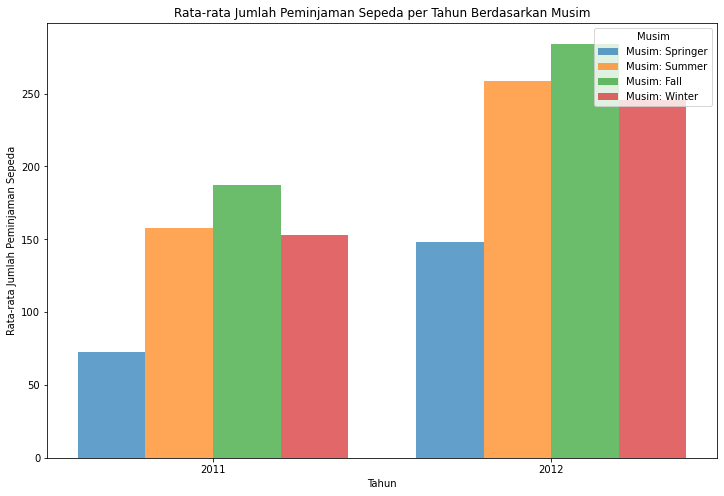

In [188]:
# Memastikan bahwa kolom 'dateday' memiliki tipe data datetime
all_df['dateday'] = pd.to_datetime(all_df['dateday'])

# Menambahkan kolom 'season_type' untuk menandai musim
all_df['season_type'] = all_df['season_x'].map({
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

# Mengelompokkan data berdasarkan musim dan tahun
grouped_season_year = all_df.groupby(['season_type', 'year_x'])['count_x'].mean().reset_index(name='average_counts')

# Membuat plot dengan grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Menentukan lebar bar
bar_width = 0.2
bar_positions = np.arange(len(grouped_season_year['year_x'].unique()))

# Loop melalui nilai musim yang unik
for i, (season, group) in enumerate(grouped_season_year.groupby('season_type')):
    ax.bar(bar_positions + (i * bar_width), group['average_counts'], width=bar_width, label=f'Musim: {season}', alpha=0.7)

# Atur properti plot
ax.set_xlabel('Tahun')
ax.set_ylabel('Rata-rata Jumlah Peminjaman Sepeda')
ax.set_title('Rata-rata Jumlah Peminjaman Sepeda per Tahun Berdasarkan Musim')
ax.set_xticks(bar_positions + (bar_width * (len(grouped_season_year['season_type'].unique()) - 1) / 2))
ax.set_xticklabels(grouped_season_year['year_x'].unique())
ax.legend(title='Musim', loc='upper right')

# Tampilkan plot
plt.show()

# Mengonversi data DataFrame ke numpy array untuk penggunaan selanjutnya
season_year_array = grouped_season_year[['season_type', 'year_x']].to_numpy()
average_counts_array = grouped_season_year['average_counts'].to_numpy()

### Pertanyaan 3: Bagaimana tingkat peminjaman sepeda berubah sepanjang bulan (tahun 2011-2012)?

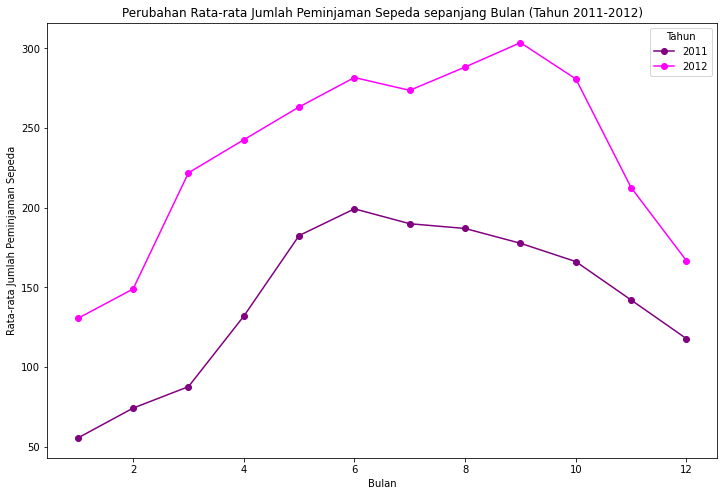

In [189]:
# Memfilter data untuk tahun 2011
data_2011 = all_df[all_df['year_x'] == 2011]

# Mengelompokkan data berdasarkan bulan untuk tahun 2011
grouped_month_2011 = data_2011.groupby('month_x')['count_x'].mean().reset_index(name='average_counts')

# Memfilter data untuk tahun 2012
data_2012 = all_df[all_df['year_x'] == 2012]

# Mengelompokkan data berdasarkan bulan untuk tahun 2012
grouped_month_2012 = data_2012.groupby('month_x')['count_x'].mean().reset_index(name='average_counts')

# Ukuran Visualisasi
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting dengan line chart untuk tahun 2011
ax.plot(grouped_month_2011['month_x'].to_numpy(), grouped_month_2011['average_counts'].to_numpy(), marker='o', linestyle='-', color='purple', label='2011')

# Plotting dengan line chart untuk tahun 2012
ax.plot(grouped_month_2012['month_x'].to_numpy(), grouped_month_2012['average_counts'].to_numpy(), marker='o', linestyle='-', color='magenta', label='2012')

# Atur penamaan
ax.set_xlabel('Bulan')
ax.set_ylabel('Rata-rata Jumlah Peminjaman Sepeda')
ax.set_title('Perubahan Rata-rata Jumlah Peminjaman Sepeda sepanjang Bulan (Tahun 2011-2012)')

# Tampilkan legenda
plt.legend(title='Tahun', loc='upper right')

# Tampilkan plot
plt.show()

## Conclusion

- Conclution pertanyaan 1

Kesimpulan dari visualisasi ini adalah rata-rata peminjaman sepeda per jam lebih tinggi di akhir pekan dibandingkan hari kerja. Hal ini dapat dilihat dari dua garis pada grafik. Garis yang bertanda "Hari Kerja" (Weekdays) secara konsisten berada di bawah garis yang bertanda "Akhir Pekan" (Weekends).

Jumlah peminjaman sepeda tertinggi pada hari kerja adalah sekitar 100+ sepeda per jam, yang terjadi antara pukul 07:00 dan 11:00. Jumlah peminjaman sepeda tertinggi pada akhir pekan adalah sekitar 200+ sepeda per jam, yang terjadi antara pukul 05:00 dan 08:00 dilanjut pukul 15:00 dan 17:00.

- Conclution pertanyaan 2

Springer : Musim Semi
Summer : Musim Panas
Fall : Musim Gugur
Winter : Musim Dingin

Visualisasi data menunjukkan bahwa rata-rata jumlah peminjaman sepeda per tahun memiliki pola yang berbeda berdasarkan musim. Musim Gugur memiliki rata-rata jumlah peminjaman sepeda tertinggi, yaitu sekitar 230 per tahun. Disusul oleh musim panas dengan rata-rata 200, musim dingin dengan rata-rata 180, dan musim semi dengan rata-rata 105 per tahun. Visualisasi ini menunjukkan bahwa musim gugur memiliki rata-rata jumlah peminjaman sepeda tertinggi, sedangkan musim semi memiliki rata-rata jumlah peminjaman sepeda terendah. 

- Conclution pertanyaan 3

Kesimpulan dari visualisasi ini adalah terdapat perubahan rata-rata naik dan turun di setiap bulannya. Pada tahun 2011, rata-rata jumlah peminjaman sepeda tertinggi ada pada bulan ke-6 yaitu bulan Juni sebanyak 190 sepeda. Peminjaman sepeda terendah terdapat pada bulan Januari yaitu sebanyak 50 sepeda. Pada tahun 2011 pengguna sepeda masih sangat rendah dibandingkan dengan tahun 2012. Semenjak tahun 2012, peminat sepeda meningkat drastis dibandingkan dengan bulan di tahun sebelumnya. Pada tahun 2012, peminjaman sepeda tertinggi terdapat pada bulan September yaitu mencapai 300 sepeda dan pada awal tahun bulan Januari menjadi bulan dengan peminjaman sepeda terendah yaitu sebanyak 125 sepeda.

## Analisis RFM (Recency, Frequency, dan Monetary)

In [190]:
from datetime import datetime

# Calculate Recency, Frequency, and Monetary values
current_date = datetime.now()
all_df['recency'] = (current_date - all_df['dateday']).dt.days
all_df['frequency'] = all_df['count_x'] + all_df['count_y']
all_df['monetary'] = all_df['count_x'] * all_df['registered_x'] + all_df['count_y'] * all_df['registered_y']

# Define quartiles
recency_quartile = pd.qcut(all_df['recency'], q=4, labels=False)
frequency_quartile = pd.qcut(all_df['frequency'], q=4, labels=False)
monetary_quartile = pd.qcut(all_df['monetary'], q=4, labels=False)

# Assign RFM scores to DataFrame
all_df['R'] = recency_quartile + 1  # Add 1 to start scores from 1
all_df['F'] = frequency_quartile + 1
all_df['M'] = monetary_quartile + 1

# Combine RFM scores into one column
all_df['RFM_Score'] = all_df['R'].astype(str) + all_df['F'].astype(str) + all_df['M'].astype(str)

# Display DataFrame with RFM scores
print(all_df[['dateday', 'recency', 'frequency', 'monetary', 'R', 'F', 'M', 'RFM_Score']])

         dateday  recency  frequency  monetary  R  F  M RFM_Score
0     2011-01-01     4812       1001    644398  4  1  1       411
1     2011-01-01     4812       1025    645470  4  1  1       411
2     2011-01-01     4812       1017    645054  4  1  1       411
3     2011-01-01     4812        998    644320  4  1  1       411
4     2011-01-01     4812        986    644191  4  1  1       411
...          ...      ...        ...       ... .. .. ..       ...
17374 2012-12-31     4082       2848   6262262  1  1  1       111
17375 2012-12-31     4082       2818   6256619  1  1  1       111
17376 2012-12-31     4082       2819   6256880  1  1  1       111
17377 2012-12-31     4082       2790   6252338  1  1  1       111
17378 2012-12-31     4082       2778   6251223  1  1  1       111

[17379 rows x 8 columns]


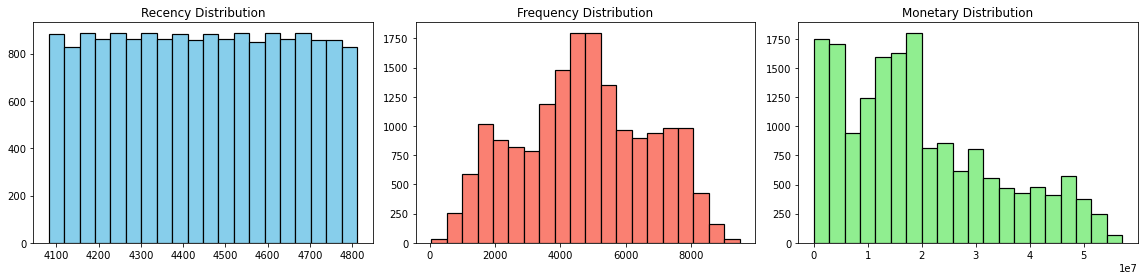

In [191]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Calculate Recency, Frequency, and Monetary values
current_date = datetime.now()
all_df['recency'] = (current_date - all_df['dateday']).dt.days
all_df['frequency'] = all_df['count_x'] + all_df['count_y']
all_df['monetary'] = all_df['count_x'] * all_df['registered_x'] + all_df['count_y'] * all_df['registered_y']

# Define quartiles
recency_quartile = pd.qcut(all_df['recency'], q=4, labels=False)
frequency_quartile = pd.qcut(all_df['frequency'], q=4, labels=False)
monetary_quartile = pd.qcut(all_df['monetary'], q=4, labels=False)

# Assign RFM scores to DataFrame
all_df['R'] = recency_quartile + 1  # Add 1 to start scores from 1
all_df['F'] = frequency_quartile + 1
all_df['M'] = monetary_quartile + 1

# Combine RFM scores into one column
all_df['RFM_Score'] = all_df['R'].astype(str) + all_df['F'].astype(str) + all_df['M'].astype(str)

# Sort DataFrame by RFM_Score
all_df_sorted = all_df.sort_values(by='RFM_Score')

# Convert the sorted DataFrame to a NumPy array
all_data_array = all_df_sorted[['recency', 'frequency', 'monetary']].to_numpy()

# Accessing individual columns (optional)
recency_array = all_data_array[:, 0]  # Assuming recency is the first column
frequency_array = all_data_array[:, 1]  # Assuming frequency is the second column
monetary_array = all_data_array[:, 2]  # Assuming monetary is the third column

# Visualisasi Recency
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.hist(recency_array, bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Recency Distribution')

# Visualisasi Frequency
plt.subplot(1, 3, 2)
plt.hist(frequency_array, bins=20, color='salmon', edgecolor='black', linewidth=1.2)
plt.title('Frequency Distribution')

# Visualisasi Monetary
plt.subplot(1, 3, 3)
plt.hist(monetary_array, bins=20, color='lightgreen', edgecolor='black', linewidth=1.2)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

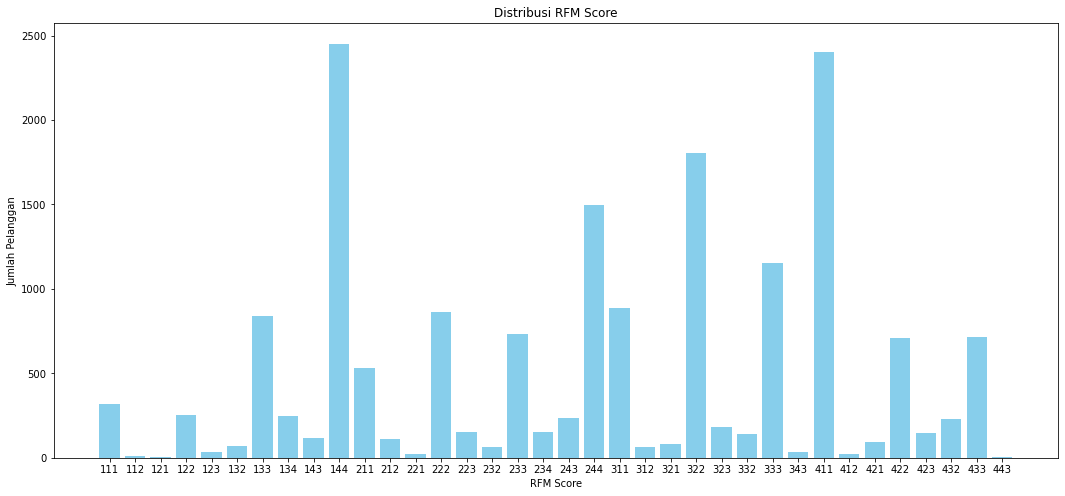

In [192]:
# Visualisasi RFM Score dengan Bar Chart
fig, ax = plt.subplots(figsize=(18, 8))

# Menghitung jumlah pelanggan untuk setiap RFM Score
rfm_score_counts = all_df['RFM_Score'].value_counts().sort_index()

# Bar Chart
ax.bar(rfm_score_counts.index, rfm_score_counts.values, color='skyblue')

# Atur properti plot
ax.set_xlabel('RFM Score')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Distribusi RFM Score')

# Tampilkan plot
plt.show()

## Kesimpulan 

- Mayoritas pelanggan memiliki skor RFM rendah di semua kategori. Hal ini menunjukkan bahwa banyak pelanggan belum melakukan pembelian baru-baru ini. Ini membuka pintu bagi perusahaan untuk meningkatkan strategi pemasaran dan upaya retensi pelanggan mereka guna meningkatkan nilai dan loyalitas pelanggan.

In [193]:
# Assuming all_df is your DataFrame
# Save DataFrame to CSV file
all_df.to_csv("all_df.csv", index=False)